In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import plotly.express as px


os.getcwd()

'/Users/johanlen/Desktop/Kings/Induvidual Project/data'

In [84]:
# pd.read_csv('/Users/johanlen/Desktop/Kings/Induvidual Project/data/all_data/2021-09/2021-09-metropolitan-stop-and-search.csv')


df_all


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Date1
0,Person search,2020-01-01 00:00:00+00:00,False,NaN,51.546371,-0.076007,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,2020/01
1,Person search,2020-01-01 00:01:00+00:00,False,NaN,51.509232,-0.117576,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Fireworks,Arrest,NaN,NaN,2020/01
2,Person search,2020-01-01 00:05:00+00:00,False,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Fireworks,Penalty Notice for Disorder,NaN,NaN,2020/01
3,Person search,2020-01-01 00:05:00+00:00,False,NaN,NaN,NaN,Male,18-24,Black/African/Caribbean/Black British - Caribbean,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,2020/01
4,Person search,2020-01-01 00:07:00+00:00,False,NaN,51.588914,-0.027220,Male,NaN,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Fireworks,A no further action disposal,NaN,NaN,2020/01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809354,Person and Vehicle search,2020-11-30 23:50:00+00:00,False,NaN,51.446121,-0.240868,Female,25-34,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,2020/11
809355,Person search,2020-11-30 23:50:00+00:00,False,NaN,51.583674,0.170771,Male,NaN,Asian/Asian British - Bangladeshi,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,2020/11
809356,Person search,2020-11-30 23:55:00+00:00,False,NaN,51.465313,-0.176842,Male,10-17,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN,2020/11
809357,Person search,2020-11-30 23:55:00+00:00,False,NaN,51.548314,-0.072189,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,Community resolution,NaN,NaN,2020/11


In [96]:
df_all = pd.DataFrame()

for i1 in glob.glob('/Users/johanlen/Desktop/Kings/Induvidual Project/data/all_data/*'):
    for i2 in glob.glob(i1+'/*-metropolitan-stop-and-search.csv'):
        df = pd.read_csv(i2)
        df_all = pd.concat([df_all, df], ignore_index=True)

A no further action disposal
Arrest
Caution (simple or conditional)
Community resolution
Penalty Notice for Disorder
Summons / charged by post


In [115]:
df_all['Date'] = pd.to_datetime(df_all['Date'], errors='raise')
df_all['Date1'] = df_all['Date'].dt.strftime('%Y/%m')
df_all
df_3 = df_all.groupby('Date1').count().reset_index()
# df_3

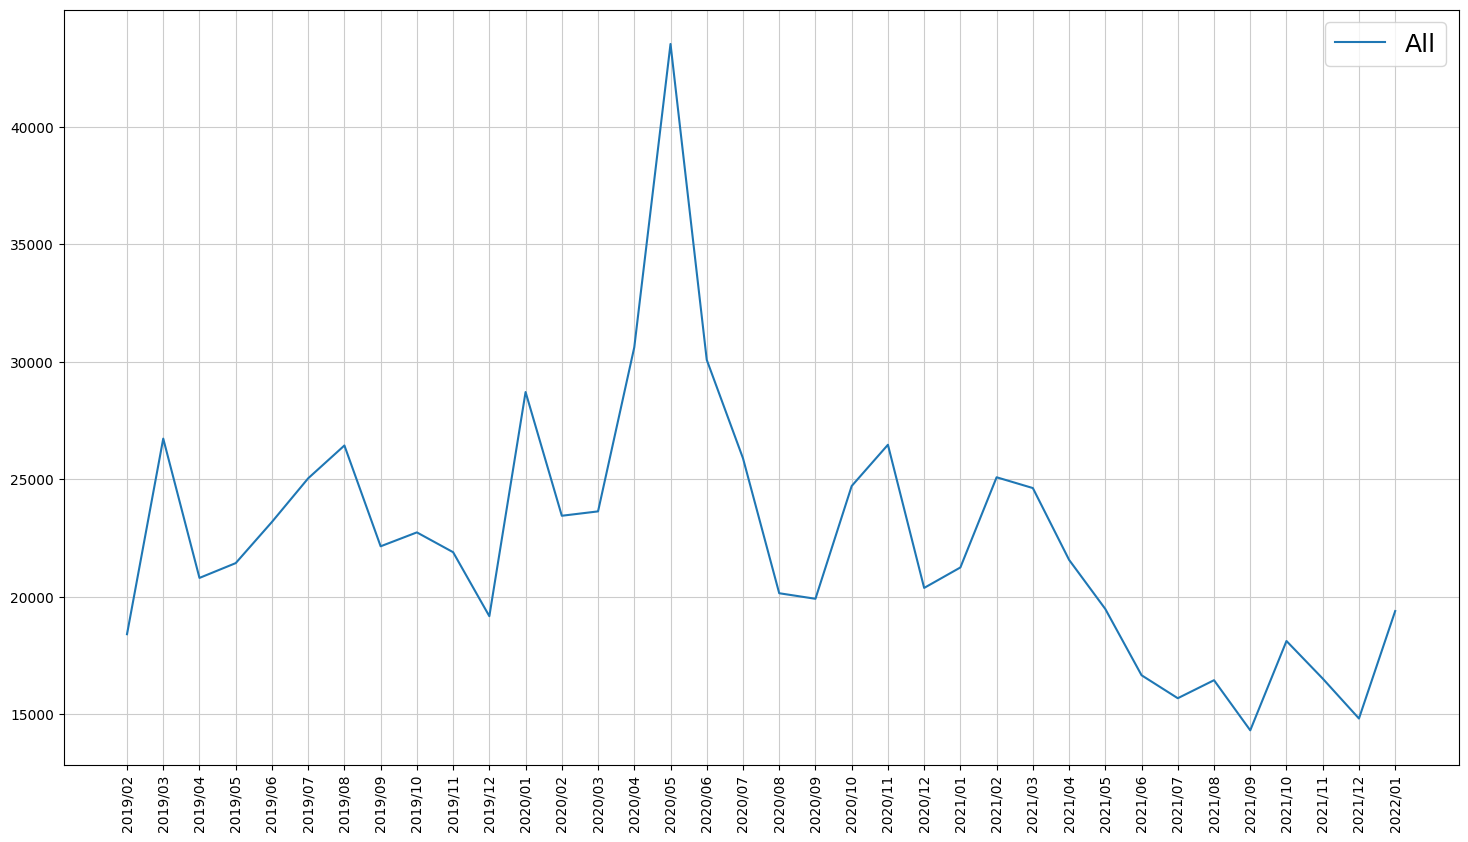

In [130]:
fig = plt.figure(dpi=100,figsize=(18,10))
plt.xticks(rotation=90)
plt.grid(axis='both', color='0.8')
plt.plot(df_3['Date1'],df_3['Type'],label='All')
plt.legend(fontsize=18)

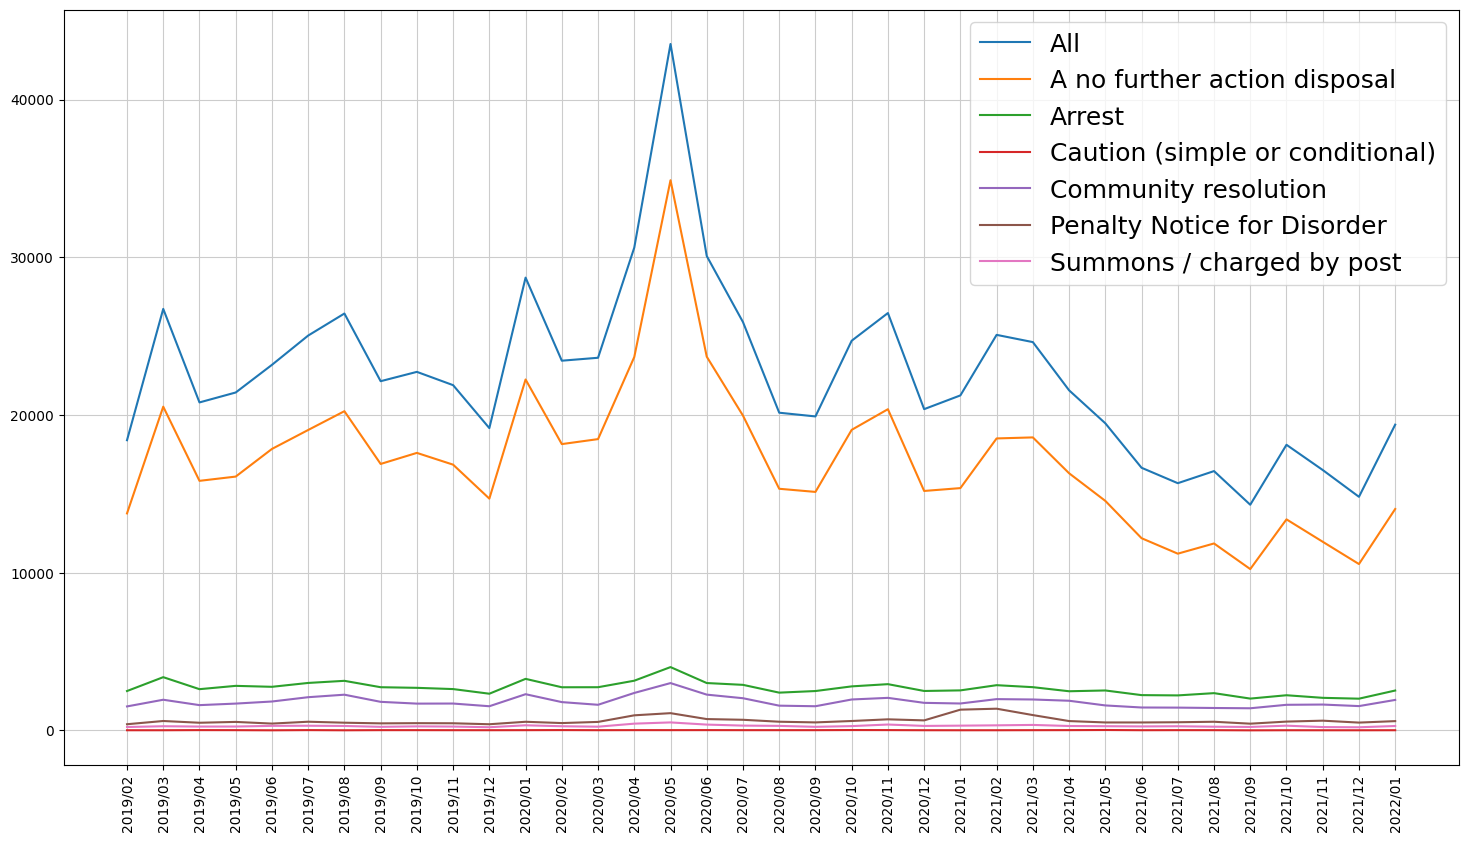

In [131]:
# for i1,i2 in df_all.groupby('Type'):


fig = plt.figure(dpi=100,figsize=(18,10))  
plt.xticks(rotation=90)


plt.plot(df_3['Date1'],df_3['Type'],label='All')
# .iteritems()
for i in df_all.groupby('Outcome').groups.keys():
    df_sub = df_all[df_all['Outcome']==i]
    df_sub = df_sub.groupby('Date1').count().reset_index()
    plt.plot(df_sub['Date1'], df_sub['Outcome'],label=i)

    
#     print(i)
    
# grouped_df.get_group(key)
# for i in df_all.groupby('Type').keys()
#     print(i)
plt.legend(fontsize=18)
plt.grid(axis='both', color='0.8')
# df_all.groupby('Outcome').count()

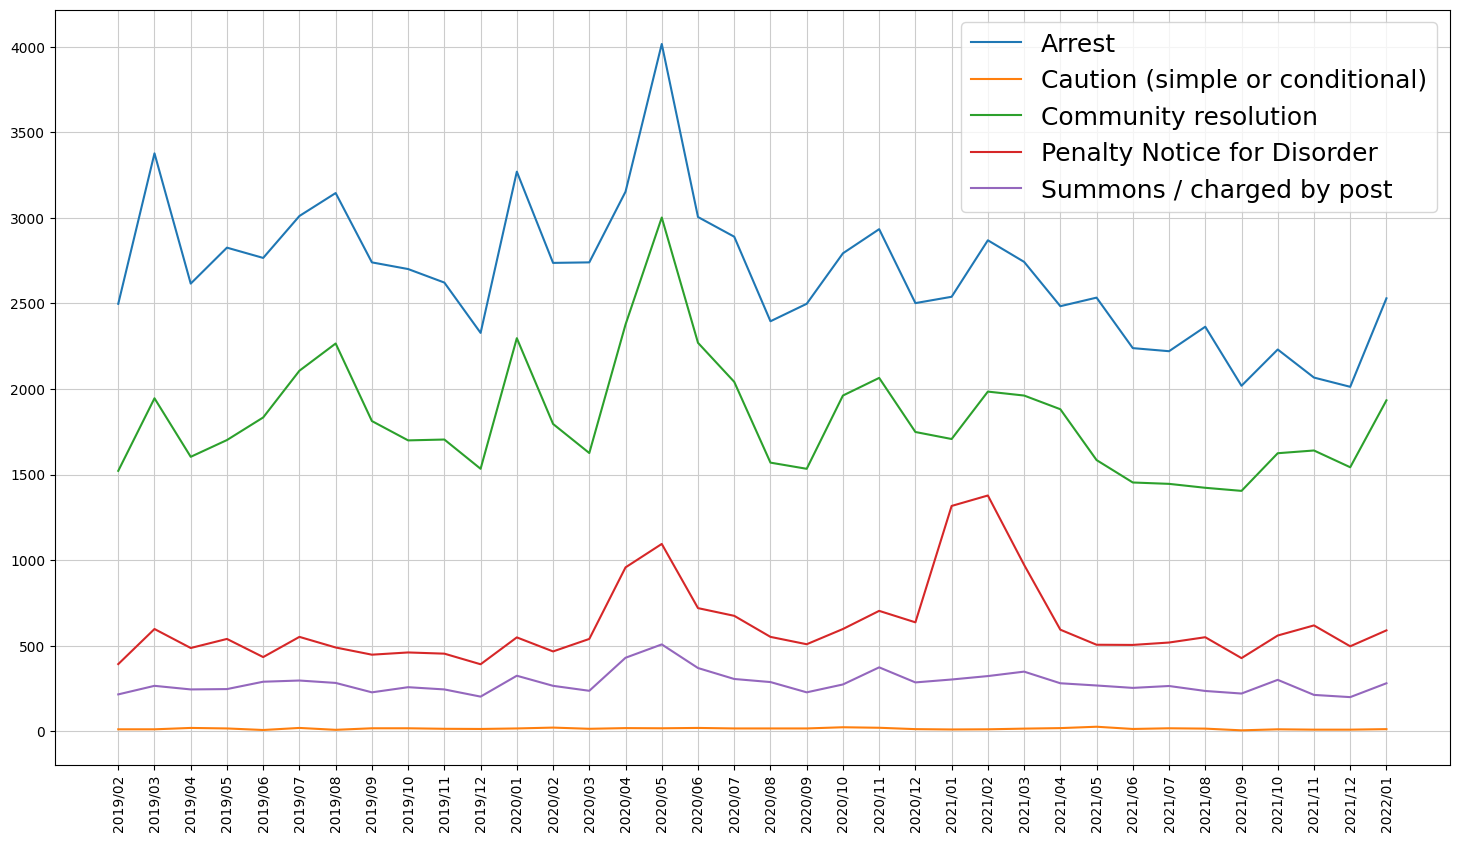

In [132]:
# for i1,i2 in df_all.groupby('Type'):


fig = plt.figure(dpi=100,figsize=(18,10))  
plt.xticks(rotation=90)


# plt.plot(df_3['Date1'],df_3['Type'],label='All')
# .iteritems()
for i in df_all.groupby('Outcome').groups.keys():
    if i != 'A no further action disposal':
        df_sub = df_all[df_all['Outcome']==i]
        df_sub = df_sub.groupby('Date1').count().reset_index()
        plt.plot(df_sub['Date1'], df_sub['Outcome'],label=i)

    
#     print(i)
    
# grouped_df.get_group(key)
# for i in df_all.groupby('Type').keys()
#     print(i)
plt.legend(fontsize=18)
plt.grid(axis='both', color='0.8')
# df_all.groupby('Outcome').count()





In [121]:
# df_all
# df_sub = df_all[df_all['Outcome']=='Arrest']
# df_sub

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Date1
1,Person search,2020-01-01 00:01:00+00:00,False,NaN,51.509232,-0.117576,Male,18-24,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Fireworks,Arrest,NaN,NaN,2020/01
13,Person search,2020-01-01 00:20:00+00:00,False,NaN,NaN,NaN,Male,18-24,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN,2020/01
53,Person search,2020-01-01 01:10:00+00:00,False,NaN,51.439290,-0.206656,Male,NaN,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN,2020/01
56,Person search,2020-01-01 01:15:00+00:00,False,NaN,51.511595,-0.135464,Male,10-17,Other ethnic group - Not stated,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN,2020/01
60,Person and Vehicle search,2020-01-01 01:20:00+00:00,False,NaN,51.342940,-0.019996,Male,25-34,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,NaN,NaN,2020/01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809331,Person and Vehicle search,2020-11-30 23:10:00+00:00,False,NaN,51.508007,-0.213484,Male,25-34,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN,2020/11
809332,Person and Vehicle search,2020-11-30 23:12:00+00:00,False,NaN,51.508007,-0.213484,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN,2020/11
809334,Person search,2020-11-30 23:14:00+00:00,False,NaN,51.531054,-0.066574,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN,2020/11
809349,Person and Vehicle search,2020-11-30 23:45:00+00:00,False,NaN,51.528782,-0.216621,Female,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN,2020/11


([<matplotlib.patches.Wedge at 0x7f9eef5c42d0>,
 [Text(-0.7995003056155294, 0.7555125818414113, 'A no further action disposal'),
  Text(0.4593683394829461, -0.9994902344098621, 'Arrest'),
  Text(0.7946362740413123, -0.7606268414786191, 'Caution (simple or conditional)'),
  Text(0.9618180275617063, -0.5337659429537528, 'Community resolution'),
  Text(1.0849825343101815, -0.1811433140964795, 'Penalty Notice for Disorder'),
  Text(1.099143866266412, -0.043390796822877026, 'Summons / charged by post')],
 [Text(-0.4360910757902887, 0.41209777191349706, '75.90%'),
  Text(0.25056454880887963, -0.5451764914962883, '11.91%'),
  Text(0.4334379676588976, -0.4148873680792468, '0.07%'),
  Text(0.524628015033658, -0.2911450597929561, '8.11%'),
  Text(0.5918086550782808, -0.09880544405262516, '2.75%'),
  Text(0.5995330179634973, -0.02366770735793292, '1.26%')])

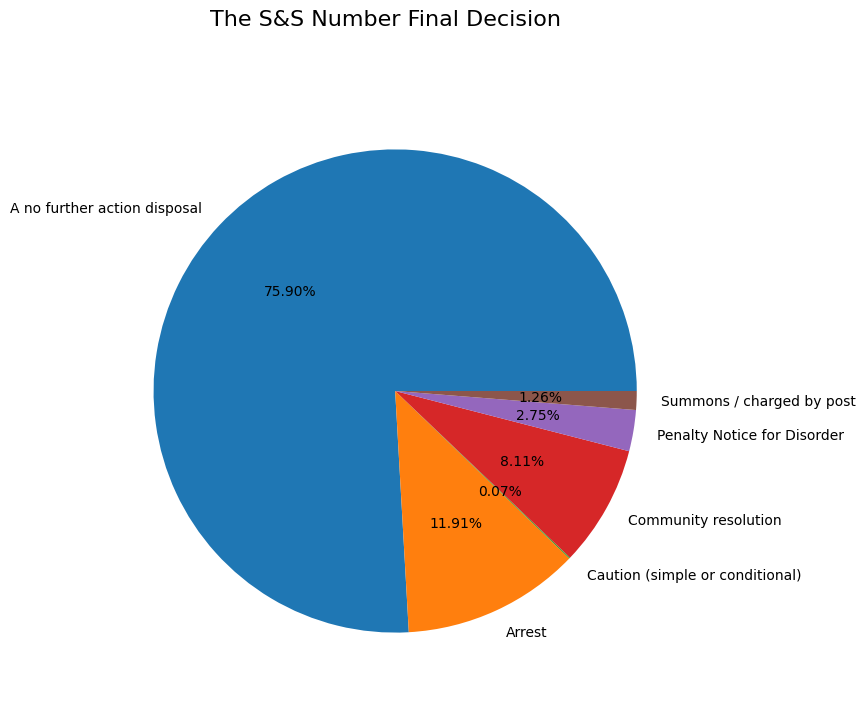

In [32]:
df_1 = df_all.groupby('Outcome').count()


fig = plt.figure(dpi=100,figsize=(8,8))

fig.suptitle('The S&S Number Final Decision', fontsize=16)

mylabels = ["A no further action disposal", 'Arrest', "Caution (simple or conditional)", "Community resolution",'Penalty Notice for Disorder','Summons / charged by post']

plt.pie(df_1['Type'], labels = mylabels,autopct='%1.2f%%')


In [23]:
df_all.head(1)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-01-01T00:00:00+00:00,False,NaN,51.546371,-0.076007,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN


In [133]:

# df = px.data.iris()
# fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
#                 "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
#                 "petal_width": "Petal Width", "petal_length": "Petal Length", },
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()


In [35]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3
